In [ ]:
import os
import zarr
from config import DATA_DIR, TARGET_DIR, USE_AUGMENTATION, PARTICLE_WEIGHTS
import numpy as np
import tensorflow as tf
from src.data_loader import *
from src.visualization import *
from src.eda import *
from src.preprocessing import *
from src.augmentation import *
from src.model import *

from albumentations import (
    Compose, HorizontalFlip, VerticalFlip, Rotate, ElasticTransform, GridDistortion, OpticalDistortion, RandomSizedCrop
)
import albumentations as A
from albumentations.core.transforms_interface import ImageOnlyTransform

# Traiter les tomogrammes
all_data = process_experiment_runs(DATA_DIR)

# Sauvegarder les r√©sultats ou continuer l'analyse
print("Traitement termin√©. R√©sum√© des donn√©es extraites :")
for ts_name, ts_content in all_data.items():
    print(f"- {ts_name}: {len(ts_content)} sous-groupes trait√©s.")


2025-03-03 23:38:02.884399: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-03 23:38:02.901504: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741045082.921816   25889 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741045082.927907   25889 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-03 23:38:02.949041: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Traitement de TS_6_6...
Arborescence pour TS_6_6:
/
 ‚îú‚îÄ‚îÄ 0 (184, 630, 630) float32
 ‚îú‚îÄ‚îÄ 1 (92, 315, 315) float32
 ‚îî‚îÄ‚îÄ 2 (46, 158, 158) float32
Traitement de TS_86_3...
Arborescence pour TS_86_3:
/
 ‚îú‚îÄ‚îÄ 0 (184, 630, 630) float32
 ‚îú‚îÄ‚îÄ 1 (92, 315, 315) float32
 ‚îî‚îÄ‚îÄ 2 (46, 158, 158) float32
Traitement de TS_73_6...
Arborescence pour TS_73_6:
/
 ‚îú‚îÄ‚îÄ 0 (184, 630, 630) float32
 ‚îú‚îÄ‚îÄ 1 (92, 315, 315) float32
 ‚îî‚îÄ‚îÄ 2 (46, 158, 158) float32
Traitement de TS_6_4...
Arborescence pour TS_6_4:
/
 ‚îú‚îÄ‚îÄ 0 (184, 630, 630) float32
 ‚îú‚îÄ‚îÄ 1 (92, 315, 315) float32
 ‚îî‚îÄ‚îÄ 2 (46, 158, 158) float32
Traitement de TS_99_9...
Arborescence pour TS_99_9:
/
 ‚îú‚îÄ‚îÄ 0 (184, 630, 630) float32
 ‚îú‚îÄ‚îÄ 1 (92, 315, 315) float32
 ‚îî‚îÄ‚îÄ 2 (46, 158, 158) float32
Traitement de TS_5_4...
Arborescence pour TS_5_4:
/
 ‚îú‚îÄ‚îÄ 0 (184, 630, 630) float32
 ‚îú‚îÄ‚îÄ 1 (92, 315, 315) float32
 ‚îî‚îÄ‚îÄ 2 (46, 158, 158) float32
Traitement de TS_69_2...
Arb

In [2]:
all_data.keys()

dict_keys(['TS_6_6', 'TS_86_3', 'TS_73_6', 'TS_6_4', 'TS_99_9', 'TS_5_4', 'TS_69_2'])

In [3]:
all_data['TS_5_4'].keys()

dict_keys(['0', '1', '2'])

In [4]:
all_data['TS_5_4']['0']['data']

array([[[-1.0589503e-08,  1.5891337e-06,  8.6985551e-07, ...,
          1.2546960e-06,  2.7620436e-07, -9.6554413e-07],
        [-4.9929668e-07,  2.7837150e-06,  3.0947467e-06, ...,
          2.8480628e-07, -8.9094044e-08, -1.4401762e-06],
        [-1.0891541e-06,  1.5427659e-06,  1.4145429e-06, ...,
          1.8715558e-07, -5.1522932e-07, -1.3863324e-06],
        ...,
        [-6.9335545e-07,  3.5703101e-07,  8.0947825e-07, ...,
         -1.4218481e-06, -9.1161525e-08, -1.2515941e-06],
        [-4.2106151e-07,  2.2317974e-07,  8.7088415e-07, ...,
         -2.5142091e-07,  4.4749459e-07,  3.5609071e-07],
        [-2.6293966e-07, -2.7313038e-07, -5.7560578e-07, ...,
          7.9891106e-07,  4.1823807e-07,  1.9056137e-07]],

       [[-8.9148364e-07,  1.9433514e-06,  4.5870165e-06, ...,
          2.9067949e-06,  8.9173477e-07, -1.3247987e-06],
        [-1.5419438e-06,  3.6550177e-06,  8.8251591e-06, ...,
         -5.1537575e-07, -6.8805934e-07, -1.8712533e-06],
        [-2.2441336e-06, 

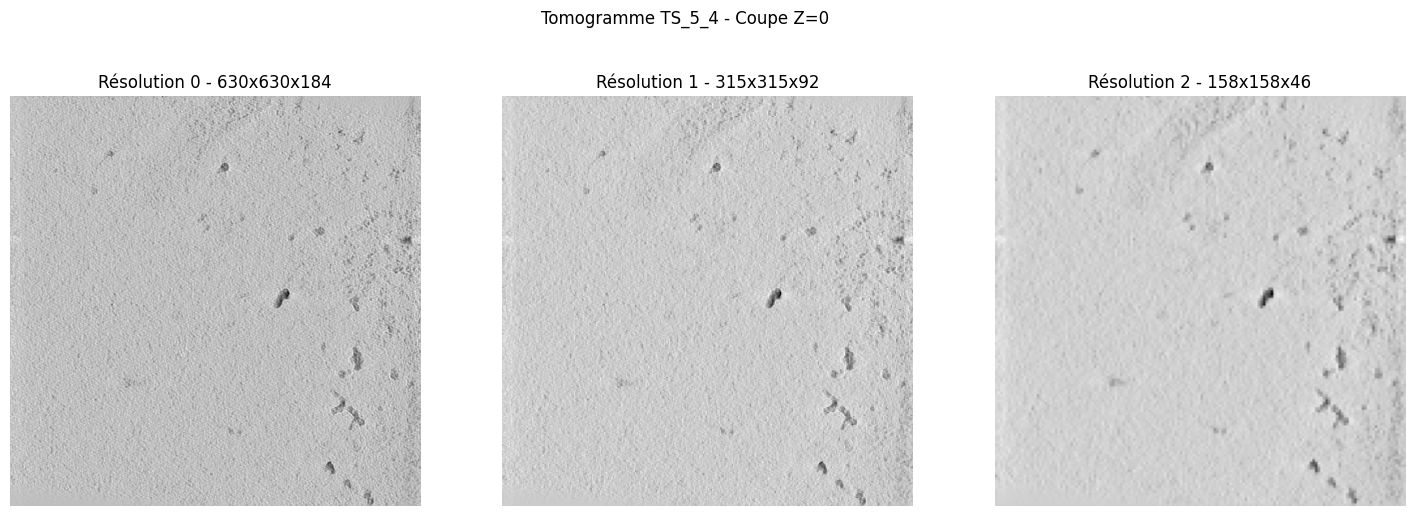

In [5]:
display_tomogram_slice(all_data, "TS_5_4", slice_index=0, all_targets=None)

In [6]:
import json

# Charger les targets
all_targets = load_targets(TARGET_DIR)

# Affichage des donn√©es charg√©es
print("R√©sum√© des donn√©es de targets :")
for tomogram, molecules in all_targets.items():
    print(f"- {tomogram}: {len(molecules)} mol√©cules trouv√©es")
    for molecule, points in molecules.items():
        print(f"  * {molecule}: {len(points)} points")


R√©sum√© des donn√©es de targets :
- TS_6_6: 6 mol√©cules trouv√©es
  * apo-ferritin: 41 points
  * virus-like-particle: 19 points
  * thyroglobulin: 35 points
  * beta-galactosidase: 11 points
  * beta-amylase: 14 points
  * ribosome: 23 points
- TS_86_3: 6 mol√©cules trouv√©es
  * apo-ferritin: 64 points
  * virus-like-particle: 29 points
  * thyroglobulin: 45 points
  * beta-galactosidase: 23 points
  * beta-amylase: 9 points
  * ribosome: 55 points
- TS_73_6: 6 mol√©cules trouv√©es
  * apo-ferritin: 95 points
  * virus-like-particle: 22 points
  * thyroglobulin: 28 points
  * beta-galactosidase: 14 points
  * beta-amylase: 12 points
  * ribosome: 46 points
- TS_6_4: 6 mol√©cules trouv√©es
  * apo-ferritin: 58 points
  * virus-like-particle: 10 points
  * thyroglobulin: 30 points
  * beta-galactosidase: 12 points
  * beta-amylase: 9 points
  * ribosome: 74 points
- TS_99_9: 6 mol√©cules trouv√©es
  * apo-ferritin: 36 points
  * virus-like-particle: 13 points
  * thyroglobulin: 49 po

In [7]:
plot_global_histogram(all_targets)
plot_tomogram_histograms(all_targets)

In [8]:
# Chemins des donn√©es

# Pr√©parer le dataset
dataset = prepare_dataset(DATA_DIR, TARGET_DIR)

print(dataset)

print_shapes(dataset)

# # Exemple : Afficher les donn√©es du premier tomogramme
# print(f"Nom du tomogramme : {dataset[0]['name']}")
# print(f"Forme de l'image (r√©solution 1) : {dataset[0]['images'][0].shape}")
# print(f"Targets : {dataset[0]['targets']}")

[{'name': 'TS_6_6', 'images': [array([[[-8.58606768e-07, -6.62938476e-07, -1.43243528e-06, ...,
         -1.03428897e-06, -7.92270143e-08, -8.35596666e-07],
        [-4.32339249e-07, -3.90250904e-07, -2.30722662e-06, ...,
         -2.20160041e-06,  6.97351993e-07, -4.60643378e-07],
        [-1.55608257e-06, -1.47009962e-06, -1.93750270e-06, ...,
         -2.06264372e-06,  7.51651328e-07, -1.12010895e-07],
        ...,
        [-4.26062797e-07,  1.00977218e-07, -5.71750377e-07, ...,
          1.51544248e-06,  1.39078296e-07, -1.47624462e-07],
        [-4.97671749e-07, -2.32426611e-08, -1.46711514e-07, ...,
          8.93327524e-07, -7.41332713e-07,  5.67639447e-08],
        [-7.98126905e-07, -3.47146397e-07,  2.50946499e-07, ...,
         -1.41466637e-06, -1.21210110e-06, -8.65692513e-08]],

       [[-6.33300886e-07,  3.37262009e-07, -9.41754593e-07, ...,
         -9.99966574e-07, -1.05512335e-07, -9.93022354e-07],
        [ 1.83296572e-06,  1.98226826e-06, -1.39598342e-06, ...,
       

In [9]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# On suppose que les dictionnaires all_data et all_targets ont √©t√© g√©n√©r√©s par vos fonctions process_experiment_runs et load_targets.
# Par exemple :
#   all_data = process_experiment_runs(DATA_DIR)
#   all_targets = load_targets(TARGET_DIR)

voxel_size = 10  # M√™me valeur utilis√©e lors du chargement et de l'analyse

# Choisir un tomogramme et une r√©solution (ici, 'TS_5_4' et le groupe '0' pour la pleine r√©solution)
tomogram_folder = 'TS_5_4'
resolution_group = '0'
slice_index = 90  # Coupe √† afficher sur l'axe Z



display_tomogram_slice(all_data, tomogram_folder, slice_index, all_targets=all_targets, resolution=resolution_group)


In [10]:
# # same with napari

# colors = {
#     "apo-ferritin": 'red',
#     "beta-amylase": 'green',
#     "beta-galactosidase": 'blue',
#     "ribosome": 'orange',
#     "thyroglobulin": 'purple',
#     "virus-like-particle": 'cyan',
#     # Vous pouvez ajouter d'autres mol√©cules si n√©cessaire.
# }

# import napari

# # Choisir un tomogramme et une r√©solution (ici, 'TS_5_4' et le groupe '0' pour la pleine r√©solution)
# tomogram_folder = 'TS_5_4'
# resolution_group = '0'

# # Charger le volume du tomogramme
# tomogram_volume = all_data[tomogram_folder][resolution_group]['data']

# # Cr√©er une nouvelle instance Napari
# viewer = napari.Viewer()

# # Ajouter le volume du tomogramme
# viewer.add_image(tomogram_volume, name=tomogram_folder)

# # Ajouter les cibles (targets) si elles existent
# if tomogram_folder in all_targets:
#     molecules = all_targets[tomogram_folder]
#     print(f"Chargement des cibles pour {tomogram_folder}...")
#     print('Il y a', len(molecules), 'mol√©cules')
    
#     for molecule, points in molecules.items():
#         print(f"  * {molecule}: {len(points)} points")
#         points_array = np.array([
#             [point["location"]["z"], point["location"]["y"], point["location"]["x"]]  # Permuter les axes X et Z
#             for point in points
#         ]) / voxel_size

#         print("Shape du tomogramme:", tomogram_volume.shape)
#         print("Min des points:", points_array.min(axis=0))
#         print("Max des points:", points_array.max(axis=0))

#         print("Il y a", len(points_array), "points")
#         print("Premier point:", points_array[0])
        

#         # Ajouter les points √† la visualisation (petite sph√®re pour chaque point)
#         viewer.add_points(points_array, name=molecule, size=13, face_color=colors.get(molecule, 'white'))
        
#     # v√©rifier l'origine des axes (en haut √† gauche dans napari)
#     viewer.add_points(np.array([[0, 0, 0]]), name='origine', size=13, face_color='yellow')

# # run the viewer
# viewer.show()


In [11]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# On suppose que les dictionnaires all_data et all_targets ont √©t√© g√©n√©r√©s par vos fonctions process_experiment_runs et load_targets.
# Par exemple :
#   all_data = process_experiment_runs(DATA_DIR)
#   all_targets = load_targets(TARGET_DIR)

tomogram_folder = 'TS_5_4'
resolution_group = '2'
slice_index = 23  # Choix d'une slice au milieu du volume de r√©solution 2 (le volume a 46 slices)

display_tomogram_slice(all_data, tomogram_folder, slice_index, all_targets=all_targets, resolution=resolution_group)
display_tomogram_slice(all_data, tomogram_folder, slice_index, all_targets=all_targets)


# --- PARTIE 2 : PR√âPARATION DES PATCHES ET DES MASQUES DE SEGMENTATION ---

In [12]:
X_train_list = []
Y_train_list = []

# Ici, num_cubes_axis doit √™tre choisi de fa√ßon √† diviser exactement les dimensions du volume.
# Par exemple, pour le volume (184, 630, 630), on pourra choisir num_cubes_axis = 2 ou 4
# si les dimensions sont exactement divisibles par ce nombre.
num_cubes_axis = 8  # Exemple : divise le volume en 2x2x2 = 8 patches
resolution = '2'

# G√©n√©rer les donn√©es d'entra√Ænement
X_train, Y_train, Y_train_int = generate_training_data(dataset, resolution='2', num_cubes_axis=8)


print("X_train shape:", X_train.shape)
print("Y_train_int shape:", Y_train_int.shape)

# Conversion du masque en encodage one-hot (le mod√®le attend n_classes canaux en sortie)
Y_train = tf.keras.utils.to_categorical(Y_train_int, num_classes=7)
print("Y_train shape (one-hot):", Y_train.shape)

X_train shape: (3584, 5, 19, 19, 1)
Y_train_int shape: (3584, 5, 19, 19)
Y_train shape (one-hot): (3584, 5, 19, 19, 7)


Nombre total de patches: 3584
Nombre de patches avec prot√©ines: 1466 (40.9%)
Nombre de patches sans prot√©ines: 2118 (59.1%)


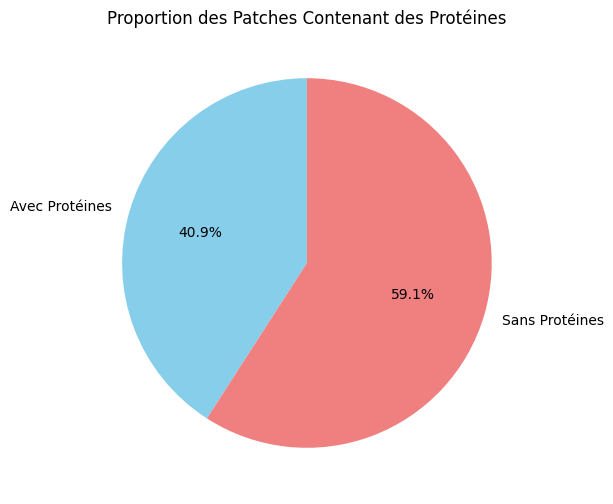

In [13]:
plot_patch_proportions(Y_train_int)

X_train_balanced shape: (2932, 5, 19, 19, 1)
Y_train_int_balanced shape: (2932, 5, 19, 19)
Nombre total de patches: 2932
Nombre de patches avec prot√©ines: 1466 (50.0%)
Nombre de patches sans prot√©ines: 1466 (50.0%)


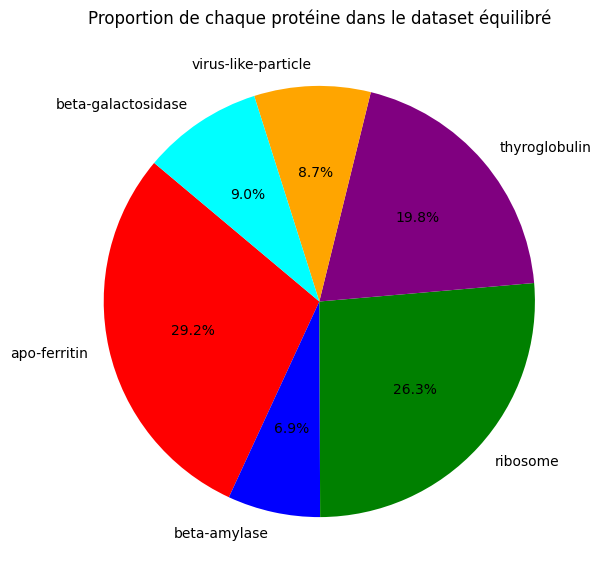

In [14]:
# √âquilibrer le dataset
X_train_balanced, Y_train_balanced, Y_train_int_balanced = balance_dataset(X_train, Y_train_int, num_classes=7)

print("X_train_balanced shape:", X_train_balanced.shape)
print("Y_train_int_balanced shape:", Y_train_int_balanced.shape)

# V√©rifier les nouvelles proportions
plot_patch_proportions(Y_train_int_balanced)

# Afficher la distribution des classes dans le dataset √©quilibr√©
plot_class_distribution(Y_train_int_balanced)

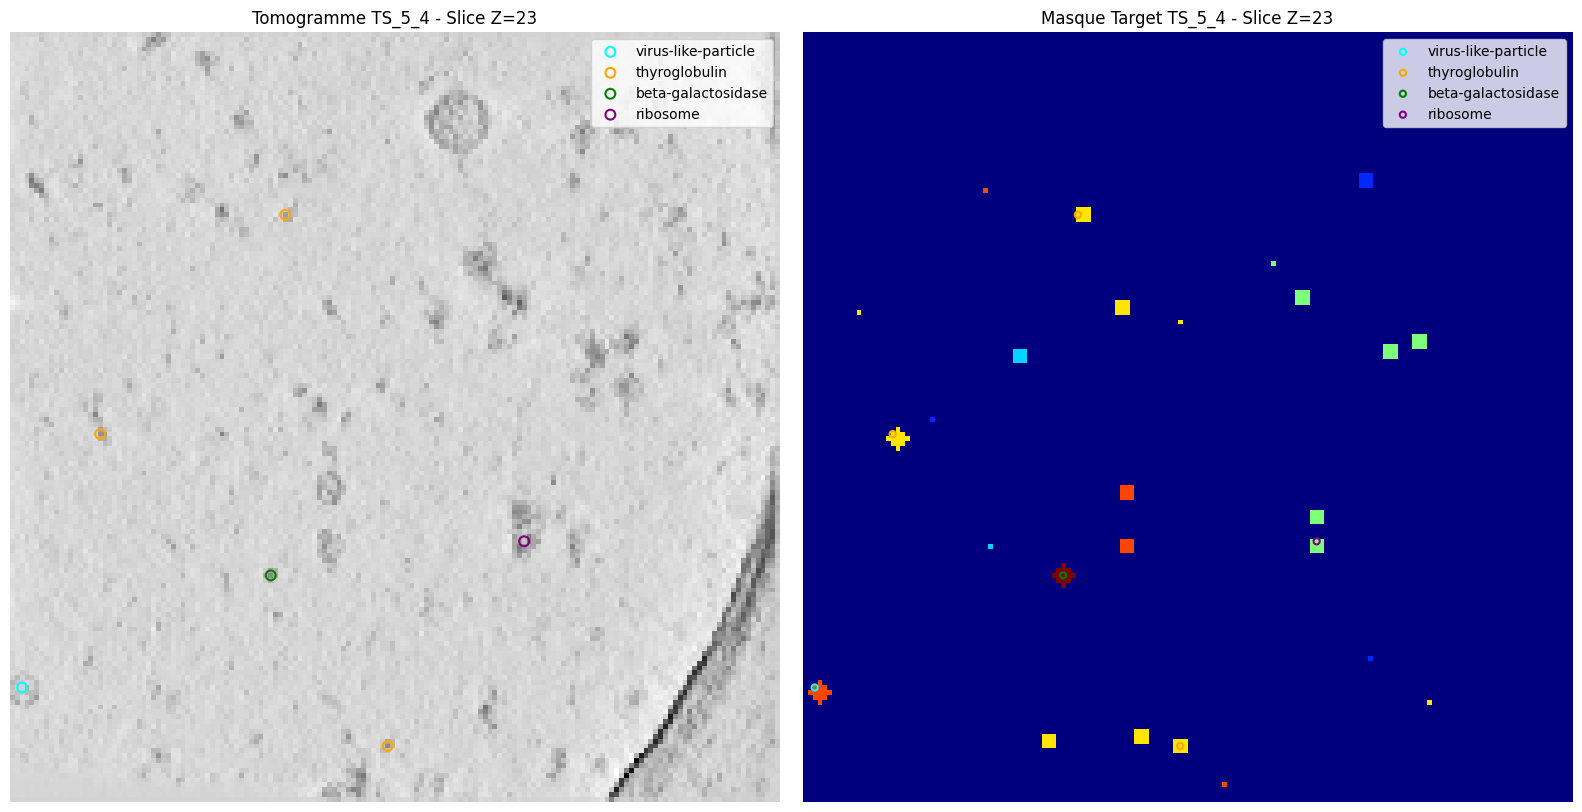

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from config import VOXEL_SIZES



# --- Exemple d'utilisation ---
# On suppose que all_data et all_targets ont √©t√© g√©n√©r√©s pr√©c√©demment,
# et que class_mapping est d√©fini (comme dans l'exemple fourni).
voxel_size = 40
tomogram_folder = 'TS_5_4'
resolution_group = '2'
slice_index = 23
# get the tomogram from the dataset [{name: ..., images: ..., targets: ...}{...}] # match the name
tomogram = get_tomogram_from_dataset(dataset, tomogram_folder)



# display_tomogram_and_target(all_data, all_targets, tomogram_folder, resolution_group, slice_index, class_mapping, sphere_radius=2)
display_tomogram_and_target(tomogram, resolution_group, slice_index, sphere_radius=2)


In [16]:
print(X_train_balanced.shape)
print(Y_train_balanced.shape)

(2932, 5, 19, 19, 1)
(2932, 5, 19, 19, 7)


In [17]:
import numpy as np

# Afficher les valeurs uniques pr√©sentes dans Y_train (donn√©es segment√©es)
unique_values = np.unique(Y_train_int)  # Y_train_int est la version non one-hot de Y_train

unique_values


array([0, 1, 2, 3, 4, 5, 6], dtype=uint8)

In [18]:


# # D√©finition des transformations (utilisation d'Albumentations)
# transformations = A.Compose([
#     A.HorizontalFlip(p=0.5),
#     A.VerticalFlip(p=0.5),
#     A.RandomRotate90(p=0.5),
#     A.ElasticTransform(alpha=15, sigma=2.5, p=0.5),
#     A.GaussNoise(var_limit=(10.0, 50.0), p=0.3),
#     A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5)
# ], additional_targets={'mask': 'image'})



# # Appliquer les augmentations et cr√©er le dataset final
# X_train_augmented = []
# Y_train_augmented = []

# for i in range(len(X_train_balanced)):
#     image = X_train_balanced[i]
#     mask = Y_train_int_balanced[i]
    
#     # V√©rifier si l'image contient une prot√©ine (au moins un voxel > 0 dans le masque)
#     if np.any(mask > 0):
#         # Appliquer l'augmentation sur l'image et son masque
#         augmented_image, augmented_mask = apply_augmentations(image.squeeze(), mask, transformations)
        
#         # S'assurer que l'augmentation garde la m√™me forme
#         augmented_image = np.array(augmented_image, dtype=np.float32)
#         augmented_mask = np.array(augmented_mask, dtype=np.uint8)
        
#         # Ajouter les donn√©es transform√©es
#         X_train_augmented.append(augmented_image[..., np.newaxis])  # Restaurer la dimension du canal
#         Y_train_augmented.append(augmented_mask)
#     else:
#         # Ajouter directement les images sans augmentation si elles ne contiennent pas de prot√©ines
#         X_train_augmented.append(image)
#         Y_train_augmented.append(mask)

# # Convertir en tableau numpy
# X_train_augmented = np.array(X_train_augmented, dtype=np.float32)
# Y_train_int_augmented = np.array(Y_train_augmented, dtype=np.uint8)
# Y_train_augmented = tf.keras.utils.to_categorical(Y_train_int_augmented, num_classes=7)

# # Affichage des nouvelles tailles
# print("X_train_augmented shape:", X_train_augmented.shape)
# print("Y_train_augmented shape:", Y_train_augmented.shape)

# # Visualiser plusieurs images augment√©es avec prot√©ines associ√©es
# visualize_augmented_samples(X_train_augmented, Y_train_augmented, all_targets, voxel_size, num_samples=5)

In [19]:
# np.unique(Y_train_augmented.argmax(axis=-1), return_counts=True)

In [20]:
from sklearn.model_selection import train_test_split

if USE_AUGMENTATION:
    X_train_balanced = X_train_augmented
    Y_train_balanced = Y_train_augmented

# 1. S√©parer X_train_balanced et Y_train_balanced en train + temp (80% - 20%)
X_train, X_temp, Y_train, Y_temp = train_test_split(
    X_train_balanced, Y_train_balanced, test_size=0.2, random_state=42)

# 2. S√©parer X_temp et Y_temp en validation et test (50% pour chacun de la partie 20%)
X_val, X_test, Y_val, Y_test = train_test_split(
    X_temp, Y_temp, test_size=0.5, random_state=42)

# Afficher les tailles des splits
print(f"Train set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")


Train set: (2345, 5, 19, 19, 1), Validation set: (293, 5, 19, 19, 1), Test set: (294, 5, 19, 19, 1)


In [21]:
print("Y_train contient NaN ?", np.isnan(Y_train).any())
print("X_train contient NaN ?", np.isnan(X_train).any())


Y_train contient NaN ? False
X_train contient NaN ? False


In [22]:
import numpy as np
unique_values, counts = np.unique(Y_train, return_counts=True)
value_counts = dict(zip(unique_values, counts))

value_counts


{0.0: 25396350, 1.0: 4232725}

In [23]:
np.unique(Y_train)

array([0., 1.])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

loss_fn = weighted_categorical_crossentropy(PARTICLE_WEIGHTS, CLASS_MAPPING, n_classes)

model = unet3d_model(input_shape, n_classes, filters, dropout)
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss=loss_fn,
              metrics=['accuracy', protein_accuracy])

model.summary()

# Cr√©er un callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',  # On surveille la perte sur le set de validation
                                patience=5,         # Si la perte ne baisse pas pendant 5 √©poques, on arr√™te
                                verbose=1,          # Affiche des informations sur l'arr√™t anticip√©
                                restore_best_weights=True)  # Restaure les poids du meilleur mod√®le

# Entra√Ænement avec early stopping
history = model.fit(X_train, Y_train,
                    batch_size=1,
                    epochs=20,
                    validation_data=(X_val, Y_val),  # N'oublie pas d'ajouter un jeu de validation
                    callbacks=[early_stopping])  # Ajout du callback EarlyStopping

Model: "functional"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer         ‚îÇ (None, 23, 79,    ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ 79, 1)            ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv3d (Conv3D)     ‚îÇ (None, 23, 79,    ‚îÇ        448 ‚îÇ input_layer[0][0] ‚îÇ
‚îÇ                     ‚îÇ 79, 16)           ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization ‚îÇ (None, 23, 79,    ‚îÇ         64 ‚îÇ conv3d[0][0]      ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ 79, 16)           ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ activation          ‚îÇ (None, 23, 79,    ‚îÇ          0 ‚îÇ batch_normalizat‚Ä¶ ‚îÇ
‚îÇ (Activation)        ‚îÇ 79, 16)           ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv3d_1 (Conv3D)   ‚îÇ (None, 23, 79,    ‚îÇ      6,928 ‚îÇ activation[0][0]  ‚îÇ
‚îÇ                     ‚îÇ 79, 16)           ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalizatio‚Ä¶ ‚îÇ (None, 23, 79,    ‚îÇ         64 ‚îÇ conv3d_1[0][0]    ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ 79, 16)           ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ activation_1        ‚îÇ (None, 23, 79,    ‚îÇ          0 ‚îÇ batch_normalizat‚Ä¶ ‚îÇ
‚îÇ (Activation)        ‚îÇ 79, 16)           ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling3d       ‚îÇ (None, 12, 40,    ‚îÇ          0 ‚îÇ activation_1[0][‚Ä¶ ‚îÇ
‚îÇ (MaxPooling3D)      ‚îÇ 40, 16)           ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv3d_2 (Conv3D)   ‚îÇ (None, 12, 40,    ‚îÇ     13,856 ‚îÇ max_pooling3d[0]‚Ä¶ ‚îÇ
‚îÇ                     ‚îÇ 40, 32)           ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚

 Total params: 1,462,503 (5.58 MB)

 Trainable params: 1,461,095 (5.57 MB)

 Non-trainable params: 1,408 (5.50 KB)

Epoch 1/20


ValueError: Input 0 of layer "functional" is incompatible with the layer: expected shape=(None, 23, 79, 79, 1), found shape=(1, 5, 19, 19)

In [ ]:
# Sauvegarde du mod√®le entra√Æn√© (mod√®le complet, y compris l'architecture, les poids et les param√®tres d'optimisation et fonction de perte)
model.save('unet3d_trained_model.keras')

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.layers import (Conv3D, MaxPooling3D, UpSampling3D, BatchNormalization, 
#                                      LeakyReLU, Add, Dropout, Input, concatenate, Lambda)
# from tensorflow.keras.models import Model
# from tensorflow.keras import backend as K

# def match_tensor_3d(down, target):
#     """
#     Adjusts the tensor 'down' (from the encoder) so that its spatial dimensions
#     (depth, height, width) match those of 'target' (from the decoder).
#     It crops if the down tensor is too large and pads if it is too small.
#     Both tensors have shape (batch, d, h, w, channels).
#     """
#     ds = tf.shape(down)
#     ts = tf.shape(target)
#     # Compute differences for each spatial dimension
#     diff_d = ts[1] - ds[1]
#     diff_h = ts[2] - ds[2]
#     diff_w = ts[3] - ds[3]
    
#     # Crop if needed (if difference is negative)
#     d_crop_start = tf.maximum(-diff_d // 2, 0)
#     h_crop_start = tf.maximum(-diff_h // 2, 0)
#     w_crop_start = tf.maximum(-diff_w // 2, 0)
#     d_crop_end = ds[1] - tf.maximum(-diff_d - (-diff_d // 2), 0)
#     h_crop_end = ds[2] - tf.maximum(-diff_h - (-diff_h // 2), 0)
#     w_crop_end = ds[3] - tf.maximum(-diff_w - (-diff_w // 2), 0)
    
#     down_cropped = down[:, d_crop_start:d_crop_end, h_crop_start:h_crop_end, w_crop_start:w_crop_end, :]
    
#     # Recompute shape after cropping and determine needed padding
#     new_shape = tf.shape(down_cropped)
#     pad_d = ts[1] - new_shape[1]
#     pad_h = ts[2] - new_shape[2]
#     pad_w = ts[3] - new_shape[3]
    
#     paddings = [[0, 0],
#                 [pad_d // 2, pad_d - pad_d // 2],
#                 [pad_h // 2, pad_h - pad_h // 2],
#                 [pad_w // 2, pad_w - pad_w // 2],
#                 [0, 0]]
    
#     down_matched = tf.pad(down_cropped, paddings, "CONSTANT")
#     return down_matched

# def residual_block(x, filters, kernel_size=(3,3,3)):
#     shortcut = x
#     x = Conv3D(filters, kernel_size, padding='same')(x)
#     x = BatchNormalization()(x)
#     x = LeakyReLU()(x)
#     x = Conv3D(filters, kernel_size, padding='same')(x)
#     x = BatchNormalization()(x)
#     if K.int_shape(shortcut)[-1] != filters:
#         shortcut = Conv3D(filters, (1,1,1), padding='same')(shortcut)
#     x = Add()([shortcut, x])
#     x = LeakyReLU()(x)
#     return x

# def my_res_unet_model(input_shape, Ncl, filters=[48,64,80], dropout_rate=0):
#     inputs = Input(shape=input_shape)
#     x = inputs
#     down_layers = []
    
#     # Encoder: store skip connections
#     for f in filters[:-1]:
#         x = residual_block(x, f)
#         if dropout_rate > 0:
#             x = Dropout(dropout_rate)(x)
#         down_layers.append(x)
#         x = MaxPooling3D((2,2,2), padding='same')(x)
    
#     # Bottleneck: apply several residual blocks with last filter size
#     for _ in range(4):
#         x = residual_block(x, filters[-1])
    
#     # Decoder: upsample and concatenate with matching skip connection
#     # In the decoder loop:
#     for f, down in zip(reversed(filters[:-1]), reversed(down_layers)):
#         x = UpSampling3D((2,2,2))(x)
#         # Use a Lambda layer to adjust the skip connection tensor to match 'x'
#         down_matched = Lambda(
#             lambda t, **kwargs: match_tensor_3d(t, x),
#             output_shape=lambda input_shape: (
#                 input_shape[0],
#                 x.shape[1] if x.shape[1] is not None else input_shape[1],
#                 x.shape[2] if x.shape[2] is not None else input_shape[2],
#                 x.shape[3] if x.shape[3] is not None else input_shape[3],
#                 input_shape[-1]
#             )
#         )(down)


#         x = concatenate([x, down_matched])
#         x = residual_block(x, f)
#         x = residual_block(x, f)
#         if dropout_rate > 0:
#             x = Dropout(dropout_rate)(x)

    
#     outputs = Conv3D(Ncl, (1,1,1), padding='same', activation='softmax')(x)
#     model = Model(inputs=inputs, outputs=outputs)
#     return model

# # Focal Tversky Loss (as provided)
# def focal_tversky_loss(y_true, y_pred, alpha=0.3, beta=0.7, gamma=2.0, epsilon=1e-3):
#     y_true = tf.cast(y_true, dtype=tf.float32)
#     y_pred = tf.cast(y_pred, dtype=tf.float32)
#     y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
    
#     ones = tf.ones_like(y_pred)
#     true_pos = K.sum(y_true * y_pred, axis=[1,2,3,4])
#     false_neg = K.sum(y_true * (ones - y_pred), axis=[1,2,3,4])
#     false_pos = K.sum((ones - y_true) * y_pred, axis=[1,2,3,4])
    
#     tversky_index = (true_pos + epsilon) / (true_pos + alpha * false_neg + beta * false_pos + epsilon)
#     focal_tversky = K.pow((1 - tversky_index), gamma)
#     return K.mean(focal_tversky)

# # Parameters
# input_shape = (23, 79, 79, 1)   # Your input dimensions
# Ncl = 7                        # Number of classes (background + 6 proteins)
# filters = [48, 64, 80]         # Example filter configuration
# dropout_rate = 0               # Adjust if needed

# model = my_res_unet_model(input_shape, Ncl, filters, dropout_rate)
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
#               loss=focal_tversky_loss,
#               metrics=['accuracy'])
# model.summary()


In [ ]:
# # Cr√©er un callback EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss',  # On surveille la perte sur le set de validation
#                                 patience=5,         # Si la perte ne baisse pas pendant 5 √©poques, on arr√™te
#                                 verbose=1,          # Affiche des informations sur l'arr√™t anticip√©
#                                 restore_best_weights=True)  # Restaure les poids du meilleur mod√®le

# # Entra√Ænement avec early stopping
# history = model.fit(X_train, Y_train,
#                     batch_size=1,
#                     epochs=20,
#                     validation_data=(X_val, Y_val),  # N'oublie pas d'ajouter un jeu de validation
#                     callbacks=[early_stopping])  # Ajout du callback EarlyStopping

In [ ]:
# Sauvegarde du mod√®le entra√Æn√© (mod√®le complet, y compris l'architecture, les poids et les param√®tres d'optimisation et fonction de perte)
model.save('unet3d_resnet_trained_model.keras')

In [ ]:
# Red√©finir la fonction de perte pour l'utiliser dans le chargement du mod√®le
loss_fn = weighted_categorical_crossentropy(protein_weights, class_mapping, n_classes)

# Charger le mod√®le avec la bonne fonction de perte et la m√©trique personnalis√©e
model = tf.keras.models.load_model(
    "unet3d_trained_model.keras",
    custom_objects={
        "protein_accuracy": protein_accuracy,
        "loss": loss_fn
    }
)



# V√©rifier que le mod√®le est bien charg√©
model.summary()


In [ ]:
# S√©lectionner un patch au hasard dans X_test
index = np.random.randint(0, len(X_test))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# üîπ **Palette de couleurs pour les prot√©ines**
colors = {
    0: "gray",
    1: "red",
    2: "blue",
    3: "green",
    4: "purple",
    5: "orange",
    6: "cyan",
}

# üîπ **Mapping des classes vers les noms des prot√©ines**
class_labels = {
    0: "Fond",
    1: "apo-ferritin",
    2: "beta-amylase",
    3: "ribosome",
    4: "thyroglobulin",
    5: "virus-like-particle",
    6: "beta-galactosidase"
}

# S√©lectionner un patch au hasard dans X_train
index = np.random.randint(0, len(X_train))

# Extraire le patch d'entra√Ænement
x_sample = X_train[index]  # (23, 79, 79, 1)
y_true = Y_train[index]    # (23, 79, 79, 8) -> One-hot

# Ajouter une dimension batch pour la pr√©diction
x_sample_expanded = np.expand_dims(x_sample, axis=0)

# Effectuer la pr√©diction
y_pred = model.predict(x_sample_expanded)

# Convertir y_pred en indices de classes (prendre la classe avec la plus haute probabilit√©)
y_pred_classes = np.argmax(y_pred[0], axis=-1)  # (23, 79, 79)
y_true_classes = np.argmax(y_true, axis=-1)  # (23, 79, 79)



In [ ]:
# Apr√®s la pr√©diction sur un patch
print("Shape de x_sample:", x_sample.shape)          # Exemple : (23, 79, 79, 1)
print("Shape de y_true (one-hot):", y_true.shape)      # Exemple : (23, 79, 79, 7)
print("Shape de y_pred (one-hot):", y_pred[0].shape)     # Exemple : (23, 79, 79, 7)

# Apr√®s argmax (pour obtenir les classes)
y_true_classes = np.argmax(y_true, axis=-1)  # (23, 79, 79)
y_pred_classes = np.argmax(y_pred[0], axis=-1) # (23, 79, 79)
print("Shape de y_true_classes:", y_true_classes.shape)
print("Shape de y_pred_classes:", y_pred_classes.shape)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

def display_prediction(x_sample, y_true_classes, y_pred_classes, slice_index=23, cmap_name='jet', class_labels=None):
    # Si aucun mapping n'est fourni, utiliser une correspondance par d√©faut (les chiffres)
    if class_labels is None:
        raise ValueError("Vous devez fournir un dictionnaire 'class_labels'.")

    # Nombre de classes est automatiquement d√©termin√© depuis 'class_labels'
    n_classes = len(class_labels)
    
    cmap = plt.get_cmap(cmap_name)

    # Cr√©ation de la figure et des axes
    fig, axs = plt.subplots(2, 3, figsize=(18, 10), gridspec_kw={'height_ratios': [8, 1]})

    # Affichage de l'image brute (slice)
    axs[0, 0].imshow(x_sample[slice_index, :, :, 0], cmap="gray")
    axs[0, 0].set_title(f"Image Brute - Slice Z={slice_index}")
    axs[0, 0].axis("off")

    # Affichage du masque de v√©rit√© terrain avec la m√™me colormap
    im1 = axs[0, 1].imshow(y_true_classes[slice_index, :, :], cmap=cmap, vmin=0, vmax=n_classes-1)
    axs[0, 1].set_title(f"Masque V√©rit√© Terrain - Slice Z={slice_index}")
    axs[0, 1].axis("off")

    # Affichage de la pr√©diction du mod√®le avec la m√™me colormap
    im2 = axs[0, 2].imshow(y_pred_classes[slice_index, :, :], cmap=cmap, vmin=0, vmax=n_classes-1)
    axs[0, 2].set_title(f"Pr√©diction Mod√®le - Slice Z={slice_index}")
    axs[0, 2].axis("off")

    # Cr√©ation de la l√©gende pour le masque de v√©rit√© terrain
    patches_true = []
    for label in range(n_classes):
        color = cmap(label / (n_classes - 1))
        protein_name = class_labels.get(label, str(label))
        patches_true.append(mpatches.Patch(color=color, label=protein_name))

    axs[0, 1].legend(handles=patches_true, loc="upper right", fontsize=10, title="Vraies Classes")

    # Cr√©ation de la l√©gende pour la pr√©diction
    patches_pred = []
    for label in range(n_classes):
        color = cmap(label / (n_classes - 1))
        protein_name = class_labels.get(label, str(label))
        patches_pred.append(mpatches.Patch(color=color, label=protein_name))

    axs[0, 2].legend(handles=patches_pred, loc="upper right", fontsize=10, title="Classes Pr√©dites")

    # Ajustement du layout pour √©viter les chevauchements
    plt.tight_layout()
    plt.show()


# Mapping des classes vers les noms de prot√©ines
class_labels = {
    0: "background",
    1: "apo-ferritin",
    2: "beta-amylase",
    3: "ribosome",
    4: "thyroglobulin",
    5: "virus-like-particle",
    6: "beta-galactosidase"
}

# Exemple de boucle pour afficher 20 exemples
# On suppose que X_test et Y_test (en one-hot) sont d√©finis et que 'model' est votre mod√®le entra√Æn√©.
# Pour chaque exemple, on convertit Y_test en indices de classes et on r√©alise une pr√©diction.

for i in range(len(X_test[:20])):  # Parcours des 20 premiers exemples
    print(f"Exemple {i+1} :")
    x_sample = X_test[i]  # x_sample de forme (D, H, W, 1)
    # Conversion du masque v√©rit√© terrain one-hot en indices (shape : (D, H, W))
    y_true_int = np.argmax(Y_test[i], axis=-1)
    
    # Pr√©diction du mod√®le pour le patch choisi
    x_sample_expanded = np.expand_dims(x_sample, axis=0)
    y_pred = model.predict(x_sample_expanded)
    y_pred_int = np.argmax(y_pred[0], axis=-1)
    
    # Affichage de la pr√©diction
    display_prediction(x_sample, y_true_int, y_pred_int, slice_index=22, class_labels=class_labels)


In [ ]:
import numpy as np

def compute_iou(y_true, y_pred, class_id):
    """
    Calcule l'IoU pour une classe donn√©e (class_id) entre le masque v√©rit√© terrain et la pr√©diction.
    """
    true_class = (y_true == class_id)
    pred_class = (y_pred == class_id)
    intersection = np.logical_and(true_class, pred_class).sum()
    union = np.logical_or(true_class, pred_class).sum()
    # Si la classe n'est pr√©sente ni dans y_true ni dans y_pred, on retourne NaN pour ne pas fausser la moyenne.
    if union == 0:
        return np.nan
    return intersection / union

# Initialisation des dictionnaires pour accumuler les m√©triques pour chaque prot√©ine (hors fond, class 0)
protein_ious = {cls: [] for cls in class_labels if cls != 0}
protein_detection_counts = {cls: 0 for cls in class_labels if cls != 0}

n_samples = len(X_test)

for i in range(n_samples):
    # Extraction du patch et conversion du masque de v√©rit√© en indices de classes
    x_sample = X_test[i]                      # forme (D, H, W, 1)
    y_true_onehot = Y_test[i]                 # forme (D, H, W, n_classes)
    y_true = np.argmax(y_true_onehot, axis=-1)  # forme (D, H, W)

    # Pr√©diction pour le patch
    x_sample_expanded = np.expand_dims(x_sample, axis=0)
    y_pred_prob = model.predict(x_sample_expanded)
    y_pred = np.argmax(y_pred_prob[0], axis=-1) # forme (D, H, W)
    
    # Pour chaque prot√©ine (classes > 0), calcul de l'IoU et comptage de la d√©tection
    for cls in protein_ious:
        iou = compute_iou(y_true, y_pred, cls)
        if not np.isnan(iou):
            protein_ious[cls].append(iou)
        # Comptage : on consid√®re que la prot√©ine est d√©tect√©e si au moins un voxel pr√©dit correspond √† la classe
        if (y_pred == cls).sum() > 0:
            protein_detection_counts[cls] += 1

# Calcul des moyennes d'IoU pour chaque prot√©ine
avg_iou = {cls: np.nanmean(protein_ious[cls]) if len(protein_ious[cls]) > 0 else np.nan 
           for cls in protein_ious}
# Calcul de la fr√©quence de d√©tection (en pourcentage)
detection_freq = {cls: (protein_detection_counts[cls] / n_samples) * 100 
                  for cls in protein_detection_counts}

print("Moyenne IoU par prot√©ine :")
for cls in avg_iou:
    print(f"{class_labels[cls]}: {avg_iou[cls]:.3f}")

print("\nFr√©quence de d√©tection par prot√©ine (pourcentage d'images o√π la prot√©ine est d√©tect√©e) :")
for cls in detection_freq:
    print(f"{class_labels[cls]}: {detection_freq[cls]:.2f}%")


In [ ]:
# def display_patch_napari(x_sample, y_true_classes, y_pred_classes):
#     """
#     Affiche un patch 3D dans Napari avec l'image brute, le masque r√©el et la pr√©diction du mod√®le.
#     """
#     import napari

#     # Supposons que x_sample a la forme (23, 79, 79, 1), donc 23 slices de 79x79 pixels avec 1 canal.
#     # Nous devons supprimer la derni√®re dimension (le canal) pour en faire un volume 3D de forme (23, 79, 79)
#     x_sample = x_sample.squeeze(axis=-1)  # Forme (23, 79, 79)

#     # y_true_classes et y_pred_classes ont d√©j√† la forme (23, 79, 79), donc pas besoin de squeeze ici
#     # Si y_true_classes et y_pred_classes sont d√©j√† de forme (23, 79, 79), vous pouvez les passer directement

#     # Cr√©er une nouvelle instance Napari
#     viewer = napari.Viewer()

#     # Ajouter l'image brute (tomogramme 3D)
#     viewer.add_image(x_sample, name='Image brute', colormap='gray', opacity=1)

#     # Ajouter le masque de v√©rit√© terrain (comme des labels)
#     viewer.add_labels(y_true_classes, name='Masque V√©rit√© Terrain', opacity=0.5)

#     # Ajouter la pr√©diction du mod√®le (comme des labels)
#     viewer.add_labels(y_pred_classes, name='Pr√©diction Mod√®le', opacity=0.5)

#     # Ex√©cuter Napari
#     viewer.show()

# # Afficher le patch dans Napari
# display_patch_napari(x_sample, y_true_classes, y_pred_classes)
